# Exploration Data Analysis

We have done some data preprocessing in the previous notebook. <br>
In this notebook we will dig the data deeper to get insight and decide what will we do in the next steps. <br>

## 0. Import Library and Cleansed Data

In [1]:
fig_dir = r'..\result\eda\\'
export_figure = True

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
data_dir = r'..\data\cleansed\\'
file_name = 'data.csv'
df = pd.read_csv(data_dir+file_name)
df['became_member_on'] = pd.to_datetime(df['became_member_on'], format='%Y-%m-%d')
df.sample(5)

,gender,age,became_member_on,income,bmo_year,person,event,time,offer id,reward_x,amount,reward_y,channels,difficulty,duration,offer_type,offer_name
161155,M,41,2018-05-27,44000.0,2018,ddeb2f3458c44e819a4193a1745a42c2,offer completed,258,2298d6c36e964ae4a3e7e9706d1fb8c2,3.0,NaN,3.0,"['web', 'email', 'mobile', 'social']",7.0,7.0,discount,Offer 4
83332,M,21,2018-01-06,59000.0,2018,00aee28bbb3848dd8a31f0c91dc267dd,transaction,228,NaN,NaN,1.88,NaN,NaN,NaN,NaN,NaN,NaN
109600,M,40,2013-12-09,65000.0,2013,ca7bb6b5974c44c0a6de4cc8c1c53cd8,transaction,168,NaN,NaN,9.97,NaN,NaN,NaN,NaN,NaN,NaN
91485,F,58,2015-09-06,85000.0,2015,c0bbc13872474c63a83e8b503bb88f72,transaction,486,NaN,NaN,35.26,NaN,NaN,NaN,NaN,NaN,NaN
118695,F,60,2013-12-25,57000.0,2013,943eba7452dc43b985461489427c8bba,transaction,30,NaN,NaN,5.73,NaN,NaN,NaN,NaN,NaN,NaN


## 1. Exploration based on Customer

### 1.a. Aggregate Individual Information

In [4]:
def agg_cust(df):
    group_df = {}
    group_df['amount_sum'] = df['amount'].sum()
    group_df['amount_mean'] = df['amount'].mean()
    group_df['offer received'] = df.loc[df['event']=='offer received','event'].count()
    group_df['offer viewed'] = df.loc[df['event']=='offer viewed','event'].count()
    group_df['offer completed'] = df.loc[df['event']=='offer completed','event'].count()
    return pd.Series(group_df, index=['amount_sum', 'amount_mean', 'offer received', 'offer viewed', 'offer completed'])

df_cust = pd.DataFrame(df.groupby(['person', 'gender', 'age', 'became_member_on', 'bmo_year','income']).apply(agg_cust))
df_cust = df_cust.reset_index(inplace=False)
df_cust.sample(5)

,person,gender,age,became_member_on,bmo_year,income,amount_sum,amount_mean,offer received,offer viewed,offer completed
583,0a47df892c774c7aae037b231baae5db,M,69,2016-05-22,2016,88000.0,102.94,20.588000,3.0,3.0,1.0
2558,2d3788d960ad4fa6977a4cdbef566199,M,81,2017-04-11,2017,69000.0,97.65,19.530000,5.0,3.0,4.0
12627,da20295eb3b941699487566a84dbac6f,F,79,2018-03-07,2018,41000.0,107.36,11.928889,3.0,3.0,2.0
4441,4c6617c0224240e0b44b272a7b8de3a6,M,26,2018-04-20,2018,75000.0,25.15,3.592857,5.0,4.0,0.0
10247,af4843b3494c4e9483f2a7d2c45095ae,M,26,2017-11-11,2017,74000.0,25.36,5.072000,5.0,2.0,1.0


In [5]:
df_cust.describe()

,age,bmo_year,income,amount_sum,amount_mean,offer received,offer viewed,offer completed
count,14825.000000,14825.000000,14825.000000,14825.000000,14492.000000,14825.000000,14825.000000,14825.000000
mean,54.393524,2016.620169,65404.991568,117.028155,15.252287,4.485734,3.363238,2.188465
std,17.383705,1.198245,21598.299410,129.965016,16.543371,1.074694,1.291316,1.582193
min,18.000000,2013.000000,30000.000000,0.000000,0.150000,0.000000,0.000000,0.000000
25%,42.000000,2016.000000,49000.000000,31.450000,3.890833,4.000000,2.000000,1.000000
50%,55.000000,2017.000000,64000.000000,87.040000,14.311214,5.000000,3.000000,2.000000
75%,66.000000,2017.000000,80000.000000,160.900000,21.467625,5.000000,4.000000,3.000000
max,101.000000,2018.000000,120000.000000,1608.690000,451.470000,6.000000,6.000000,6.000000


### 1.b. Demographic Information

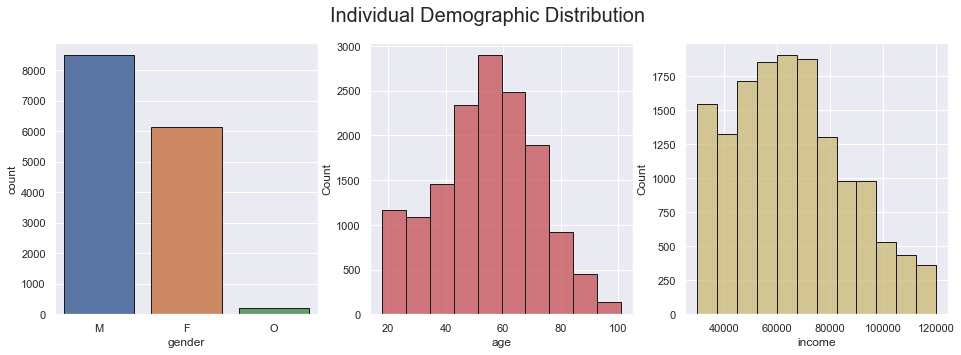

In [6]:
fig_title = 'Individual Demographic Distribution'

fig, axs = plt.subplots(1,3, figsize=(16,5))
fig.suptitle(fig_title, fontsize=20)

sns.countplot(ax=axs[0], data=df_cust, x='gender', order=['M','F', 'O'], edgecolor='k')
sns.histplot(ax=axs[1], data=df_cust, x='age', color='r', bins=10,  edgecolor='k')
sns.histplot(ax=axs[2], data=df_cust, x='income', color='y', bins=12, edgecolor='k')

if(export_figure==True):
    plt.savefig(fig_dir+fig_title+'.png')

plt.show()

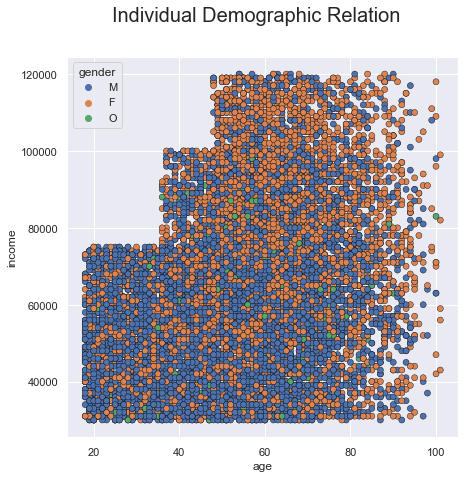

In [7]:
fig_title = 'Individual Demographic Relation'

fig, axs = plt.subplots(1,1, figsize=(7,7))
fig.suptitle(fig_title, fontsize=20)

sns.scatterplot(data=df_cust,x='age',y='income', hue='gender', hue_order=['M','F','O'], edgecolor='k')

if(export_figure==True):
    plt.savefig(fig_dir+fig_title+'.png')

plt.show()

* As we can see above that most of customers are **male**, and followed by **female**. For other genders the number is very small so that in the next analysis **we will focus on male and female gender**.
* The age of the customer follows a normal distribution where the data center around the age of 40-70. We can divide age data into 4 part: **youth** (<35), **middle** (35-48), **older** (48-80), and **senior** (80>)
* From income distribution we can say that **lower-middle income** (30k-80k) has the largest number while **upper-middle income** (80k-10k) is the second largest number. The rest is the **high income** custome (10k>).
* Scatter plot tells us that youth customer only has lower-middle income, middle age can be in a upper-middle one, and for high income only for older and senior customer.

In [8]:
def age_group(age):
    if age < 35:
        return 'Youth'
    elif age >=35 and age < 48:
        return 'Middle'
    elif age >=48 and age < 80:
        return 'Older'
    else:
        return 'Senior'
    
def income_group(income):
    if income < 80000:
        return 'Lower-Middle'
    elif income >= 80000 and income < 100000:
        return 'Upper-Middle'
    else:
        return 'High'

df_cust = df_cust[df_cust['gender']!='O']
df_cust['age_group'] = df_cust['age'].apply(age_group)
df_cust['income_group'] = df_cust['income'].apply(income_group)
df_cust.sample(5)

,person,gender,age,became_member_on,bmo_year,income,amount_sum,amount_mean,offer received,offer viewed,offer completed,age_group,income_group
2557,2d36cda33cb8495a9ce38c0dc53d64eb,M,57,2018-02-08,2018,58000.0,44.59,14.863333,5.0,5.0,1.0,Older,Lower-Middle
7186,7c04f1c0d5764d878c4301062c245ecd,F,29,2015-08-08,2015,45000.0,503.95,26.523684,6.0,6.0,3.0,Youth,Lower-Middle
12267,d35cd59ac53044be82475629775a8410,F,59,2017-10-13,2017,55000.0,10.92,3.640000,4.0,3.0,1.0,Older,Lower-Middle
12335,d4c2549073b242db839688ef8fe0b2e9,M,48,2017-04-21,2017,68000.0,76.56,19.140000,2.0,2.0,1.0,Older,Lower-Middle
14714,fe0b0b1b7fd34f84a17d1352f19a57f5,M,23,2018-06-11,2018,35000.0,24.46,2.446000,6.0,3.0,0.0,Youth,Lower-Middle


### 1.c. Became a Member Trend

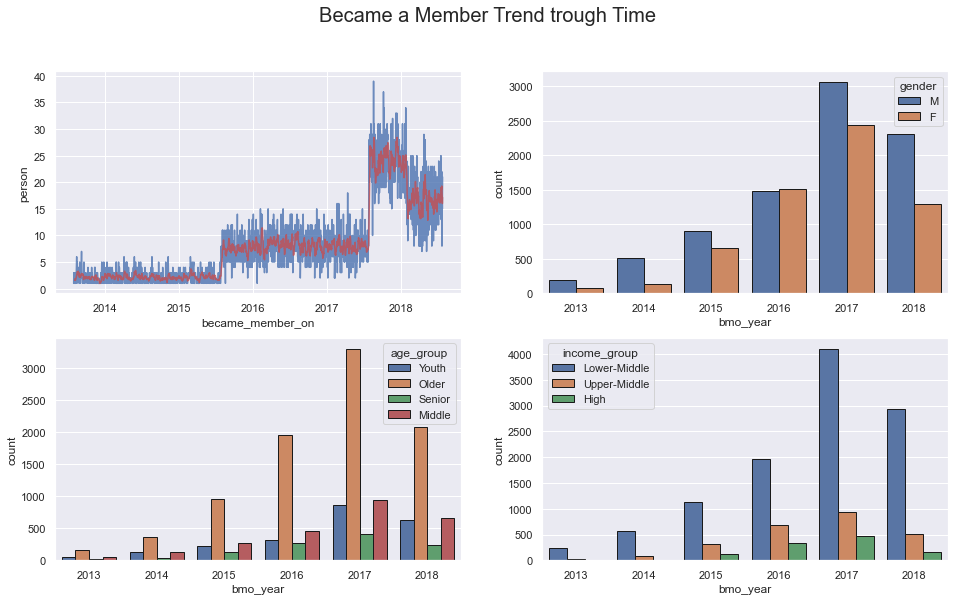

In [9]:
fig_title = 'Became a Member Trend trough Time'

df_date = pd.DataFrame(df_cust.groupby('became_member_on').count()['person'])
df_date = df_date.reset_index(inplace=False)
df_date = df_date.sort_values(by=['became_member_on'], ascending=True)
df_date['7_days_rolling'] = df_date['person'].rolling(7).mean()

fig, axs = plt.subplots(2,2, figsize=(16,9))
fig.suptitle(fig_title, fontsize=20)

sns.lineplot(ax=axs[0,0], data=df_date,x='became_member_on', y='person', alpha=0.8, color='b')
sns.lineplot(ax=axs[0,0], data=df_date,x='became_member_on', y='7_days_rolling', alpha=0.8, color='r')
sns.countplot(ax=axs[0,1], data=df_cust, x='bmo_year', hue='gender', edgecolor='k')
sns.countplot(ax=axs[1,0], data=df_cust, x='bmo_year', hue='age_group', edgecolor='k')
sns.countplot(ax=axs[1,1], data=df_cust, x='bmo_year', hue='income_group', edgecolor='k')

if(export_figure==True):
    plt.savefig(fig_dir+fig_title+'.png')

plt.show()

* In general, we can see that the daily trend of new member registrations **increased in the middle of 2015**. Then it **rose again in the middle of 2017** before **the decline in early 2018**.
* From year to year more male customers become new members except in 2016 where there are slightly more female customers.
* Older customers always dominate every year as does the lower-middle income group.

### 1.d. Customer Spend Amount

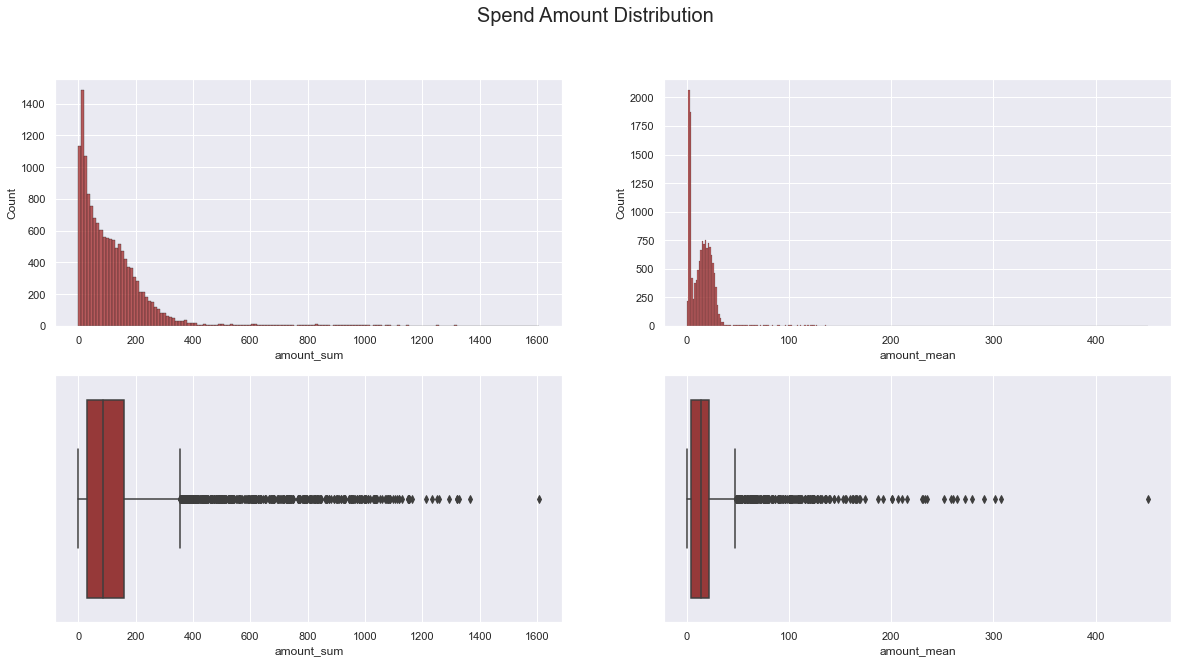

In [10]:
fig_title = 'Spend Amount Distribution'

fig, axs = plt.subplots(2,2, figsize=(20,10))
fig.suptitle(fig_title, fontsize=20)

sns.histplot(ax=axs[0,0],data=df_cust, x='amount_sum', color='brown', edgecolor='k')
sns.boxplot(ax=axs[1,0],data=df_cust, x='amount_sum', color='brown')
sns.histplot(ax=axs[0,1],data=df_cust, x='amount_mean', color='brown', edgecolor='k')
sns.boxplot(ax=axs[1,1],data=df_cust, x='amount_mean', color='brown')

if(export_figure==True):
    plt.savefig(fig_dir+fig_title+'.png')

plt.show()

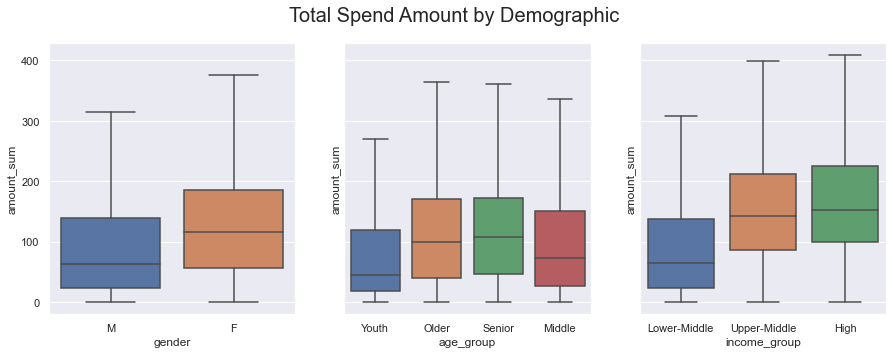

In [11]:
fig_title = 'Total Spend Amount by Demographic'

fig, axs = plt.subplots(1,3, figsize=(15,5), sharey=True)
fig.suptitle(fig_title, fontsize=20)

sns.boxplot(ax=axs[0], data=df_cust, y='amount_sum', x='gender', showfliers = False)
sns.boxplot(ax=axs[1], data=df_cust, y='amount_sum', x='age_group', showfliers = False)
sns.boxplot(ax=axs[2], data=df_cust, y='amount_sum', x='income_group', showfliers = False)

if(export_figure==True):
    plt.savefig(fig_dir+fig_title+'.png')

plt.show()

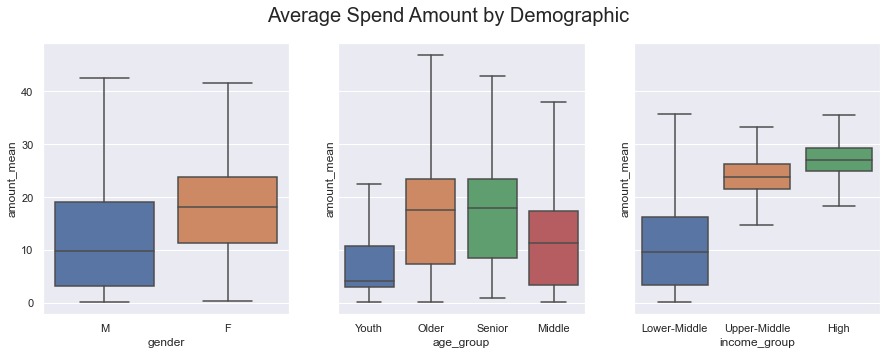

In [12]:
fig_title = 'Average Spend Amount by Demographic'

fig, axs = plt.subplots(1,3, figsize=(15,5), sharey=True)
fig.suptitle(fig_title, fontsize=20)

sns.boxplot(ax=axs[0], data=df_cust, y='amount_mean', x='gender', showfliers = False)
sns.boxplot(ax=axs[1], data=df_cust, y='amount_mean', x='age_group', showfliers = False)
sns.boxplot(ax=axs[2], data=df_cust, y='amount_mean', x='income_group', showfliers = False)

if(export_figure==True):
    plt.savefig(fig_dir+fig_title+'.png')

plt.show()

* First, for making sense of how amount distribution really is, we plot the histogram of amount. We get that small amount has the largest number of distribution and decrease to the large amount. From amount of 400 to 1600 we get really small number of customer that spend in that much, it must be our outlier for the next analysis (it can be prove from the next boxplot).
* Second, we draw amount with demographic segementation in boxplot. 
* We get here that even the female customer has less number of customer than male, but female customers spend more in transaction. 
* By the age group, we get that youth customer tends to spend in small number of amount than any other groups.
* As well ass the youth customer, the lower-middle also has the smallest number of amount. Especially when we visualize by the average of amount that show significant diffence between lower-middle and others. Since youth customer has lower-middle income, we can conclude a connection here.

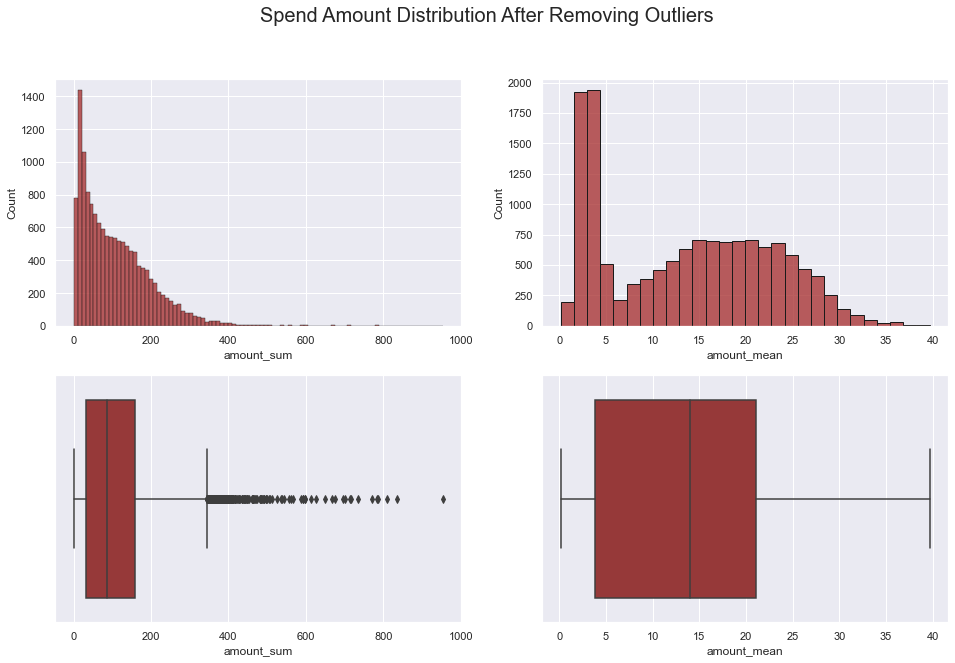

In [13]:
df_cust = df_cust[df_cust['amount_mean']<40]

fig_title = 'Spend Amount Distribution After Removing Outliers'

fig, axs = plt.subplots(2,2, figsize=(16,10))
fig.suptitle(fig_title, fontsize=20)

sns.histplot(ax=axs[0,0],data=df_cust, x='amount_sum', color='brown', edgecolor='k')
sns.boxplot(ax=axs[1,0],data=df_cust, x='amount_sum', color='brown')
sns.histplot(ax=axs[0,1],data=df_cust, x='amount_mean', color='brown', edgecolor='k')
sns.boxplot(ax=axs[1,1],data=df_cust, x='amount_mean', color='brown')

if(export_figure==True):
    plt.savefig(fig_dir+fig_title+'.png')

plt.show()

### 1.e. The Relation between How Many Offer Process Occur and the Transaction Amount

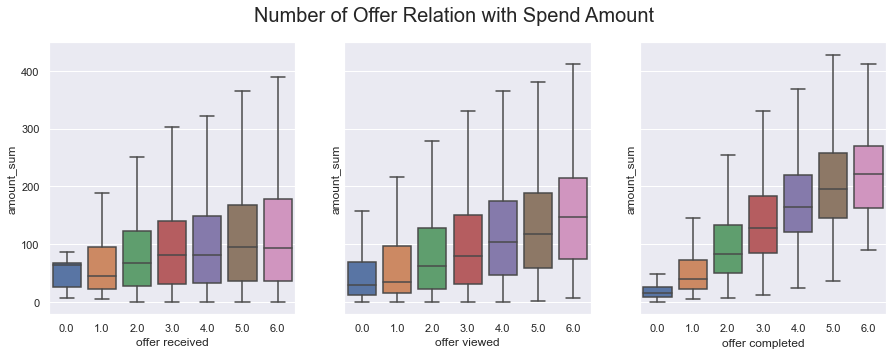

In [14]:
fig_title = 'Number of Offer Relation with Spend Amount'

fig, axs = plt.subplots(1,3, figsize=(15,5), sharey=True)
fig.suptitle(fig_title, fontsize=20)

order = [str(i)+'.0' for i in range(7)]
sns.boxplot(ax=axs[0],y=df_cust['amount_sum'], x=df_cust['offer received'].astype(str), order=order,showfliers = False)
sns.boxplot(ax=axs[1],y=df_cust['amount_sum'], x=df_cust['offer viewed'].astype(str), order=order, showfliers = False)
sns.boxplot(ax=axs[2],y=df_cust['amount_sum'], x=df_cust['offer completed'].astype(str), order=order, showfliers = False)

if(export_figure==True):
    plt.savefig(fig_dir+fig_title+'.png')

plt.show()

* The three charts above will show is there any difference on customer that received more offer and less offer to amount of transaction spend.
* From visualization only (*statistical test can be conducted if needed*), we get that for customers that received more than two times offer tend to purchase in the relative some amount. But this fact is not true with viewed and completed offer where the more viewed and completed offer the more purchase amount.

## 2. Exploration based on Offer

### 2.a Filter Only Remaining Customer

In [15]:
remaining_person = pd.DataFrame(df_cust['person'])
df = df.merge(remaining_person, left_on='person', right_on='person', how='right')
print('Remaining customer : {0:d} person' .format(df['person'].nunique()))

Remaining customer : 14007 person


### 2.b. Filter Only Row Containing Offer

In [16]:
df_offer = df[df['event'] != 'transaction']
df_offer['days'] = df_offer['time'].apply(lambda row : int(row/24))
df_offer.sample(5)

<ipython-input-16-b93159cd35a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_offer['days'] = df_offer['time'].apply(lambda row : int(row/24))


,gender,age,became_member_on,income,bmo_year,person,event,time,offer id,reward_x,amount,reward_y,channels,difficulty,duration,offer_type,offer_name,days
173612,M,66,2016-08-10,90000.0,2016,a9bbadc2f69b4da9bbe7ec7f6d4f6ff3,offer received,336,3f207df678b143eea3cee63160fa8bed,NaN,NaN,0.0,"['web', 'email', 'mobile']",0.0,4.0,informational,Offer 9,14
73011,F,53,2015-09-12,83000.0,2015,478ffc2902e948118e3bffbf524be33d,offer viewed,426,2298d6c36e964ae4a3e7e9706d1fb8c2,NaN,NaN,3.0,"['web', 'email', 'mobile', 'social']",7.0,7.0,discount,Offer 4,17
105246,M,40,2017-05-04,63000.0,2017,680c57ee0e6e46c49c1f701e4c371d0c,offer received,0,f19421c1d4aa40978ebb69ca19b0e20d,NaN,NaN,5.0,"['web', 'email', 'mobile', 'social']",5.0,5.0,bogo,Offer 0,0
104087,M,30,2018-05-01,73000.0,2018,66ecd4054d85452fbdc84086586d7203,offer viewed,174,2298d6c36e964ae4a3e7e9706d1fb8c2,NaN,NaN,3.0,"['web', 'email', 'mobile', 'social']",7.0,7.0,discount,Offer 4,7
259126,M,48,2017-05-03,36000.0,2017,feb31e39c1e3407b9fdc7e79db9274b7,offer received,408,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,2.0,"['web', 'email', 'mobile', 'social']",10.0,10.0,discount,Offer 6,17


### 2.c. Handling Invalid Offers

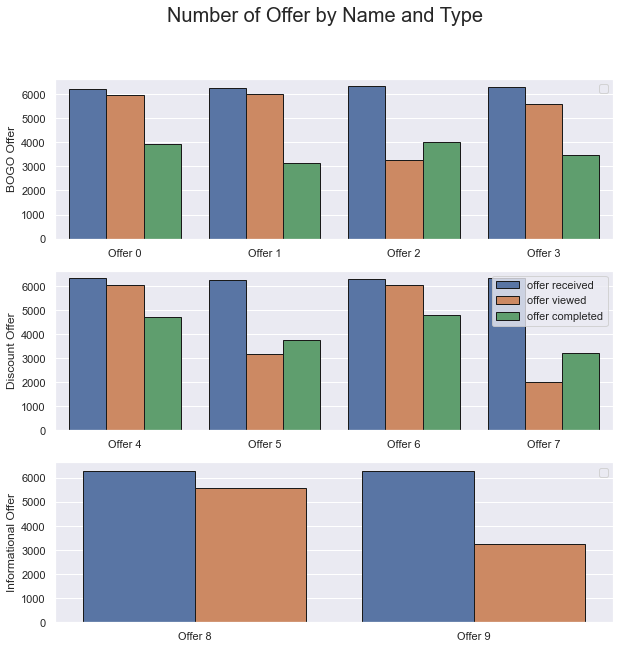

In [17]:
fig_title = 'Number of Offer by Name and Type'

type_order = ['bogo', 'discount', 'informational']
name_order = ['Offer '+str(i) for i in range(10)]
event_order = ['offer received','offer viewed', 'offer completed']

fig, axs = plt.subplots(3,1, figsize=(10,10), sharey=True)
fig.suptitle(fig_title, fontsize=20)

sns.countplot(ax=axs[0], data=df_offer[df_offer['offer_type']=='bogo'], x='offer_name', hue='event', 
              order=['Offer '+str(i) for i in range(4)], hue_order=event_order, edgecolor='k')
sns.countplot(ax=axs[1], data=df_offer[df_offer['offer_type']=='discount'], x='offer_name', hue='event', 
              order=['Offer '+str(i) for i in range(4,8)], hue_order=event_order, edgecolor='k')
sns.countplot(ax=axs[2], data=df_offer[df_offer['offer_type']=='informational'], x='offer_name', hue='event', 
              order=['Offer '+str(i) for i in range(8,10)], hue_order=event_order[:2], edgecolor='k')

axs[0].legend([])
axs[0].set_xlabel('')
axs[0].set_ylabel('BOGO Offer')

axs[1].legend()
axs[1].set_xlabel('')
axs[1].set_ylabel('Discount Offer')

axs[2].legend([])
axs[2].set_xlabel('')
axs[2].set_ylabel('Informational Offer')

if(export_figure==True):
    plt.savefig(fig_dir+fig_title+'.png')

plt.show()

Many offers are suspected of **being invalid**, several possibilities are used:
* 'offer viewed' by customer but no 'offer received' happened before
* 'offer completed' by customer but there was no 'offer viewed' before.

In addition, we can also retrieve information from the **'duration'** column which shows the length of time the offer will expire after it is received by the customer.

For more details, we can see the sample customer below.

In [18]:
sample = df_offer.loc[df_offer['person']=='d69b874c0b504bb1b445df034fa874a9', ['person','offer_type', 'offer_name','duration','days', 'event']]
sample

,person,offer_type,offer_name,duration,days,event
218227,d69b874c0b504bb1b445df034fa874a9,bogo,Offer 2,7.0,0,offer received
218228,d69b874c0b504bb1b445df034fa874a9,bogo,Offer 2,7.0,0,offer viewed
218229,d69b874c0b504bb1b445df034fa874a9,bogo,Offer 2,7.0,0,offer completed
218230,d69b874c0b504bb1b445df034fa874a9,bogo,Offer 0,5.0,7,offer received
218231,d69b874c0b504bb1b445df034fa874a9,bogo,Offer 0,5.0,7,offer viewed
218232,d69b874c0b504bb1b445df034fa874a9,bogo,Offer 0,5.0,7,offer completed
218233,d69b874c0b504bb1b445df034fa874a9,bogo,Offer 1,5.0,14,offer received
218234,d69b874c0b504bb1b445df034fa874a9,bogo,Offer 1,5.0,14,offer viewed
218235,d69b874c0b504bb1b445df034fa874a9,bogo,Offer 1,5.0,15,offer completed
218236,d69b874c0b504bb1b445df034fa874a9,discount,Offer 4,7.0,17,offer received


In [19]:
df_offer = df_offer.loc[:,
                      ['person','offer_type', 'offer_name','duration','days', 'event']]

df_offer = df_offer.sort_values(['person','days','offer_name'])

received_offer = []
offer_status = []
day_expire = []
in_duration = []

for index,row in df_offer.iterrows():
    if row['event'] == 'offer received':
        receivedOffer = row['offer_name']
        offerStatus = 'received'
        dayExpire = row['days']+row['duration']
        inDuration = True
    elif row['event'] == 'offer viewed':
        if (dayExpire - row['days'] > 0) and (offerStatus == 'received') :
            inDuration = True
            offerStatus = 'viewed'
        else:
            inDuration = False
    else:
        if (dayExpire - row['days'] > 0) and offerStatus == 'viewed' :
            inDuration = True
            offerStatus = 'completed'
        else:
            inDuration = False
            offerStatus = 'completed'
    received_offer.append(receivedOffer)
    day_expire.append(dayExpire)
    in_duration.append(inDuration)
    
df_offer['received_offer'] = received_offer
df_offer['day_expire'] = day_expire
df_offer['in_duration'] = in_duration
df_offer = df_offer[df_offer['in_duration']==True]

df_offer.sample(5)

,person,offer_type,offer_name,duration,days,event,received_offer,day_expire,in_duration
136567,86c04f5536bb458b9194374bad66d22c,bogo,Offer 3,7.0,8,offer completed,Offer 3,14.0,True
183841,b3cca059a8a346cc89fabfe1b7b5ee88,informational,Offer 9,4.0,18,offer viewed,Offer 9,21.0,True
148253,91d4a97d4ded46ff8fd8a35e98471925,bogo,Offer 1,5.0,0,offer received,Offer 1,5.0,True
154861,9820af405835425998184770498fecd9,bogo,Offer 2,7.0,24,offer received,Offer 2,31.0,True
184741,b4a4a6b9648a45baa15f438ffb5565e9,bogo,Offer 3,7.0,24,offer received,Offer 3,31.0,True


Above we have filtered the offers that are suspected to be invalid from the order terms and from the expiration period.

To check it we do the plot again.

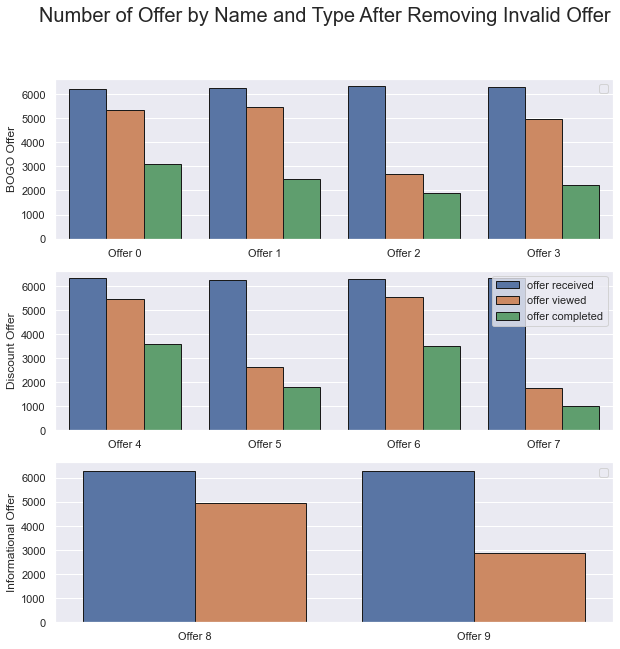

In [20]:
fig_title = 'Number of Offer by Name and Type After Removing Invalid Offer'

type_order = ['bogo', 'discount', 'informational']
name_order = ['Offer '+str(i) for i in range(10)]
event_order = ['offer received','offer viewed', 'offer completed']

fig, axs = plt.subplots(3,1, figsize=(10,10), sharey=True)
fig.suptitle(fig_title, fontsize=20)

sns.countplot(ax=axs[0], data=df_offer[df_offer['offer_type']=='bogo'], x='offer_name', hue='event', 
              order=['Offer '+str(i) for i in range(4)], hue_order=event_order, edgecolor='k')
sns.countplot(ax=axs[1], data=df_offer[df_offer['offer_type']=='discount'], x='offer_name', hue='event', 
              order=['Offer '+str(i) for i in range(4,8)], hue_order=event_order, edgecolor='k')
sns.countplot(ax=axs[2], data=df_offer[df_offer['offer_type']=='informational'], x='offer_name', hue='event', 
              order=['Offer '+str(i) for i in range(8,10)], hue_order=event_order[:2], edgecolor='k')

axs[0].legend([])
axs[0].set_xlabel('')
axs[0].set_ylabel('BOGO Offer')

axs[1].legend()
axs[1].set_xlabel('')
axs[1].set_ylabel('Discount Offer')

axs[2].legend([])
axs[2].set_xlabel('')
axs[2].set_ylabel('Informational Offer')

if(export_figure==True):
    plt.savefig(fig_dir+fig_title+'.png')

plt.show()

### 2.d. The Chance Offer Types Get Viewed and Completed

In [21]:
def agg_offer(df):
    group_df = {}
    group_df['offer received'] = df.loc[df['event']=='offer received','event'].count()
    group_df['offer viewed'] = df.loc[df['event']=='offer viewed','event'].count()
    group_df['offer completed'] = df.loc[df['event']=='offer completed','event'].count()
    return pd.Series(group_df, index=[ 'offer received', 'offer viewed', 'offer completed'])

df_aggoffer = pd.DataFrame(df_offer.groupby(['offer_type']).apply(agg_offer))
df_aggoffer = df_aggoffer.reset_index(inplace=False)
df_aggoffer['offer not-viewed'] = df_aggoffer['offer received'] - df_aggoffer['offer viewed']
df_aggoffer['offer not-completed'] = df_aggoffer['offer received'] - df_aggoffer['offer completed']
df_aggoffer = df_aggoffer.melt(id_vars=['offer_type'], var_name='event', value_name='count')
df_aggoffer = df_aggoffer[df_aggoffer['event']!='offer received']

df_aggoffer['group'] = df_aggoffer.apply(lambda row: 'viewing' if 'viewed' in row['event'] else 'completion', axis=1)
df_aggoffer = df_aggoffer.sort_values(by=['offer_type', 'group'])
df_aggoffer = df_aggoffer.reset_index(inplace=False)

df_aggoffer

,index,offer_type,event,count,group
0,6,bogo,offer completed,9693,completion
1,12,bogo,offer not-completed,15406,completion
2,3,bogo,offer viewed,18457,viewing
3,9,bogo,offer not-viewed,6642,viewing
4,7,discount,offer completed,9896,completion
5,13,discount,offer not-completed,15268,completion
6,4,discount,offer viewed,15386,viewing
7,10,discount,offer not-viewed,9778,viewing
8,8,informational,offer completed,0,completion
9,14,informational,offer not-completed,12590,completion


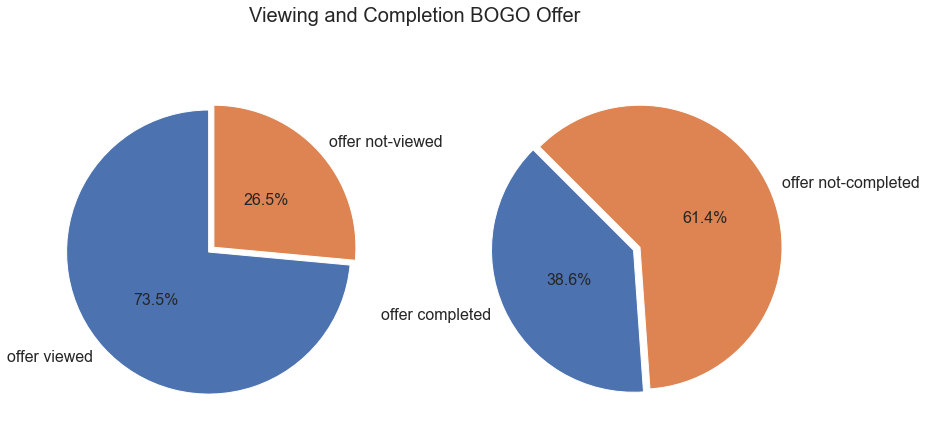

In [22]:
bogo = df_aggoffer[(df_aggoffer['offer_type']=='bogo')]
discount = df_aggoffer[(df_aggoffer['offer_type']=='discount')]
informational = df_aggoffer[(df_aggoffer['offer_type']=='informational')]

fig_title = 'Viewing and Completion BOGO Offer'

explode = [0.05,0]
fig, ((axs1, axs2))= plt.subplots(1,2, figsize=(14,7))
fig.suptitle(fig_title, fontsize=20)

axs1.pie(x=bogo.loc[bogo['group']=='viewing','count'],labels=bogo.loc[bogo['group']=='viewing','event'],
         startangle=90, autopct='%1.1f%%', pctdistance=0.5, 
         explode=explode, textprops={'fontsize': 16})
axs2.pie(x=bogo.loc[bogo['group']=='completion','count'],labels=bogo.loc[bogo['group']=='completion','event'],
         startangle=135, autopct='%1.1f%%', pctdistance=0.5, 
         explode=explode, textprops={'fontsize': 16})

if(export_figure==True):
    plt.savefig(fig_dir+fig_title+'.png')

plt.show()

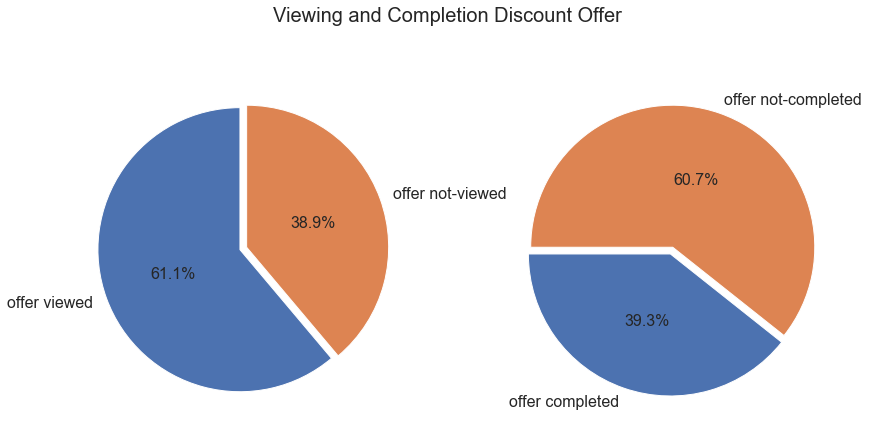

In [23]:
fig_title = 'Viewing and Completion Discount Offer'

explode = [0.05,0]
fig, ((axs1, axs2))= plt.subplots(1,2, figsize=(14,7))
fig.suptitle(fig_title, fontsize=20)

axs1.pie(x=discount.loc[discount['group']=='viewing','count'],labels=discount.loc[discount['group']=='viewing','event'],
         startangle=90, autopct='%1.1f%%', pctdistance=0.5, 
         explode=explode, textprops={'fontsize': 16} )
axs2.pie(x=discount.loc[discount['group']=='completion','count'],labels=discount.loc[discount['group']=='completion','event'],
         startangle=180, autopct='%1.1f%%', pctdistance=0.5, 
         explode=explode, textprops={'fontsize': 16})

if(export_figure==True):
    plt.savefig(fig_dir+fig_title+'.png')

plt.show()

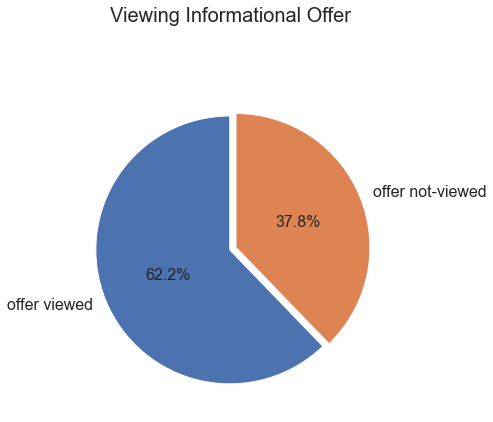

In [24]:
fig_title = 'Viewing Informational Offer'

explode = [0.05,0]
fig, axs= plt.subplots(1,1, figsize=(6,7))
fig.suptitle(fig_title, fontsize=20)

axs.pie(x=informational.loc[informational['group']=='viewing','count'],labels=informational.loc[informational['group']=='viewing','event'],
         startangle=90, autopct='%1.1f%%', pctdistance=0.5, 
         explode=explode, textprops={'fontsize': 16} )

if(export_figure==True):
    plt.savefig(fig_dir+fig_title+'.png')

plt.show()

Although customers are more interested in seeing the BOGO offer significantly than the discount offer, the chances of the customer to complete the offer are almost the same (~39%).

Below, we will group each customer into customers who have a high chance and a low chance to see and complete each offer type.

In [25]:
df_offercount = df_offer.groupby(['person', 'offer_type','event']).count()['offer_name']
df_offercount = df_offercount.reset_index(inplace=False)

df_offerpivot = pd.pivot_table(df_offercount, index=['person', 'offer_type'], columns='event', values='offer_name')
df_offerpivot = df_offerpivot.reset_index(inplace=False)
df_offerpivot = df_offerpivot.fillna(0)

df_offerpivot['completed %'] = df_offerpivot.apply(lambda row: row['offer viewed']*100/row['offer received'] if row['offer_type']=='informational' else row['offer completed']*100/row['offer received'], axis=1)

df_offerchance = pd.pivot_table(df_offerpivot, index=['person'], columns=['offer_type'], values='completed %')
df_offerchance = df_offerchance.reset_index(inplace=False)

df_offerchance.sample(20)


offer_type,person,bogo,discount,informational
11256,cd3b9972b00e4ec8ae3c5da14980a70c,33.333333,0.000000,NaN
2337,2c356d1a3dab479aac70311dc9c01c42,100.000000,50.000000,100.0
10018,b56392c4644c4fa5abcd1e8f4b94b0f6,100.000000,100.000000,100.0
12291,e049d2a073364b07b2a0b5e3259bffe3,40.000000,NaN,100.0
8713,9df0134f61724188b93ad623f9f32289,0.000000,0.000000,0.0
4969,5ad6172a9cef4e848559f38d10feab02,0.000000,50.000000,NaN
10656,c16f538af70b43e89b600a4ca8b34e7d,0.000000,NaN,50.0
9009,a30db84597704ffa9ff25f14c3b2d807,0.000000,0.000000,NaN
1792,2201a5d7a57b4430b803c34926a7f1a2,100.000000,100.000000,100.0
4987,5b4191f947974c44859ef4b205d3f3e0,100.000000,33.333333,NaN


In [26]:
df_offerchance = df_offerchance.fillna(50)
df_offerchance

offer_type,person,bogo,discount,informational
0,0009655768c64bdeb2e877511632db8f,0.000000,0.000000,100.0
1,0020c2b971eb4e9188eac86d93036a77,50.000000,50.000000,0.0
2,0020ccbbb6d84e358d3414a3ff76cffd,100.000000,100.000000,100.0
3,003d66b6608740288d6cc97a6903f4f0,50.000000,66.666667,100.0
4,00426fe3ffde4c6b9cb9ad6d077a13ea,50.000000,25.000000,100.0
...,...,...,...,...
13997,fff29fb549084123bd046dbc5ceb4faa,40.000000,100.000000,50.0
13998,fff7576017104bcc8677a8d63322b5e1,0.000000,50.000000,50.0
13999,fff8957ea8b240a6b5e634b6ee8eafcf,0.000000,0.000000,0.0
14000,fffad4f4828548d1b5583907f2e9906b,66.666667,50.000000,100.0


In [27]:
df_offerchance['chance bogo'] = df_offerchance['bogo'].apply(lambda row: 'High' if row>50 else 'Low')
df_offerchance['chance discount'] = df_offerchance['discount'].apply(lambda row: 'High' if row>50 else 'Low')
df_offerchance['chance informational'] = df_offerchance['informational'].apply(lambda row: 'High' if row>50 else 'Low')

#df_offerchance = df_offerchance.drop(['bogo', 'discount'], axis=1)
df_offerchance.sample(5)

offer_type,person,bogo,discount,informational,chance bogo,chance discount,chance informational
6881,7dc62a0a1736432f9a2dbafae8a7687c,100.0,100.0,50.0,High,High,Low
11132,cb1e075f874b488a81995ea4dc3e12fe,0.0,50.0,100.0,Low,Low,High
12860,ea852d66433644f39563afec12ae39c2,25.0,0.0,50.0,Low,Low,Low
7515,89471970d2fc4f5ebe1712424467d0b5,0.0,0.0,0.0,Low,Low,Low
5280,60c1304c8cee4e1fac2d0e094957b1a8,50.0,0.0,100.0,Low,Low,High


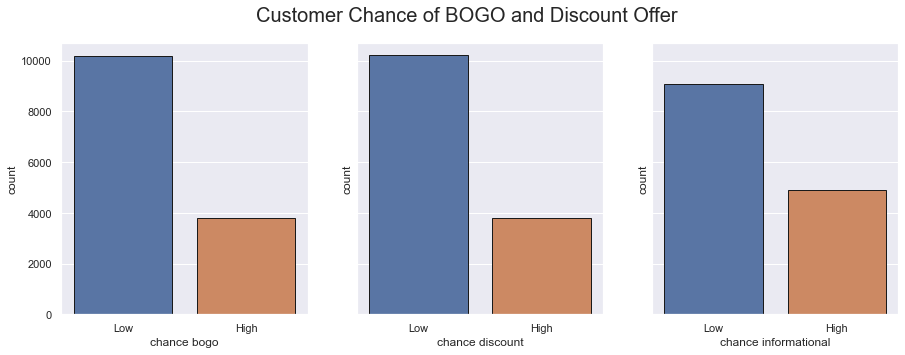

In [28]:
fig_title = 'Customer Chance of BOGO and Discount Offer'

fig, axs = plt.subplots(1,3, figsize=(15,5), sharey=True)
fig.suptitle(fig_title, fontsize=20)

sns.countplot(ax=axs[0], data=df_offerchance, x='chance bogo', edgecolor='k')
sns.countplot(ax=axs[1], data=df_offerchance, x='chance discount', edgecolor='k')
sns.countplot(ax=axs[2], data=df_offerchance, x='chance informational', edgecolor='k', order=['Low','High'])

if(export_figure==True):
    plt.savefig(fig_dir+fig_title+'.png')

plt.show()

## 3. Export Final Data

In [29]:
#df_cust = df_cust.drop(['offer received','offer viewed', 'offer completed'], axis=1)
df_cust

,person,gender,age,became_member_on,bmo_year,income,amount_sum,amount_mean,offer received,offer viewed,offer completed,age_group,income_group
0,0009655768c64bdeb2e877511632db8f,M,33,2017-04-21,2017,72000.0,127.60,15.950000,5.0,4.0,3.0,Youth,Lower-Middle
2,0020c2b971eb4e9188eac86d93036a77,F,59,2016-03-04,2016,90000.0,196.86,24.607500,5.0,3.0,3.0,Older,Upper-Middle
3,0020ccbbb6d84e358d3414a3ff76cffd,F,24,2016-11-11,2016,60000.0,154.05,12.837500,4.0,4.0,3.0,Youth,Lower-Middle
4,003d66b6608740288d6cc97a6903f4f0,F,26,2017-06-21,2017,73000.0,48.34,2.685556,5.0,4.0,3.0,Youth,Lower-Middle
5,00426fe3ffde4c6b9cb9ad6d077a13ea,F,19,2016-08-09,2016,65000.0,68.51,4.030000,5.0,2.0,1.0,Youth,Lower-Middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14819,fff29fb549084123bd046dbc5ceb4faa,F,59,2017-08-31,2017,93000.0,291.47,26.497273,6.0,5.0,6.0,Older,Upper-Middle
14821,fff7576017104bcc8677a8d63322b5e1,M,71,2017-10-31,2017,73000.0,29.94,4.990000,5.0,4.0,3.0,Older,Lower-Middle
14822,fff8957ea8b240a6b5e634b6ee8eafcf,M,71,2018-02-18,2018,56000.0,12.15,2.430000,3.0,2.0,0.0,Older,Lower-Middle
14823,fffad4f4828548d1b5583907f2e9906b,M,34,2017-01-23,2017,34000.0,88.83,7.402500,4.0,4.0,3.0,Youth,Lower-Middle


In [30]:
df_offerchance

offer_type,person,bogo,discount,informational,chance bogo,chance discount,chance informational
0,0009655768c64bdeb2e877511632db8f,0.000000,0.000000,100.0,Low,Low,High
1,0020c2b971eb4e9188eac86d93036a77,50.000000,50.000000,0.0,Low,Low,Low
2,0020ccbbb6d84e358d3414a3ff76cffd,100.000000,100.000000,100.0,High,High,High
3,003d66b6608740288d6cc97a6903f4f0,50.000000,66.666667,100.0,Low,High,High
4,00426fe3ffde4c6b9cb9ad6d077a13ea,50.000000,25.000000,100.0,Low,Low,High
...,...,...,...,...,...,...,...
13997,fff29fb549084123bd046dbc5ceb4faa,40.000000,100.000000,50.0,Low,High,Low
13998,fff7576017104bcc8677a8d63322b5e1,0.000000,50.000000,50.0,Low,Low,Low
13999,fff8957ea8b240a6b5e634b6ee8eafcf,0.000000,0.000000,0.0,Low,Low,Low
14000,fffad4f4828548d1b5583907f2e9906b,66.666667,50.000000,100.0,High,Low,High


In [31]:
df_final = df_cust.merge(df_offerchance, left_on='person', right_on='person', how='right')
df_final

,person,gender,age,became_member_on,bmo_year,income,amount_sum,amount_mean,offer received,offer viewed,offer completed,age_group,income_group,bogo,discount,informational,chance bogo,chance discount,chance informational
0,0009655768c64bdeb2e877511632db8f,M,33,2017-04-21,2017,72000.0,127.60,15.950000,5.0,4.0,3.0,Youth,Lower-Middle,0.000000,0.000000,100.0,Low,Low,High
1,0020c2b971eb4e9188eac86d93036a77,F,59,2016-03-04,2016,90000.0,196.86,24.607500,5.0,3.0,3.0,Older,Upper-Middle,50.000000,50.000000,0.0,Low,Low,Low
2,0020ccbbb6d84e358d3414a3ff76cffd,F,24,2016-11-11,2016,60000.0,154.05,12.837500,4.0,4.0,3.0,Youth,Lower-Middle,100.000000,100.000000,100.0,High,High,High
3,003d66b6608740288d6cc97a6903f4f0,F,26,2017-06-21,2017,73000.0,48.34,2.685556,5.0,4.0,3.0,Youth,Lower-Middle,50.000000,66.666667,100.0,Low,High,High
4,00426fe3ffde4c6b9cb9ad6d077a13ea,F,19,2016-08-09,2016,65000.0,68.51,4.030000,5.0,2.0,1.0,Youth,Lower-Middle,50.000000,25.000000,100.0,Low,Low,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13997,fff29fb549084123bd046dbc5ceb4faa,F,59,2017-08-31,2017,93000.0,291.47,26.497273,6.0,5.0,6.0,Older,Upper-Middle,40.000000,100.000000,50.0,Low,High,Low
13998,fff7576017104bcc8677a8d63322b5e1,M,71,2017-10-31,2017,73000.0,29.94,4.990000,5.0,4.0,3.0,Older,Lower-Middle,0.000000,50.000000,50.0,Low,Low,Low
13999,fff8957ea8b240a6b5e634b6ee8eafcf,M,71,2018-02-18,2018,56000.0,12.15,2.430000,3.0,2.0,0.0,Older,Lower-Middle,0.000000,0.000000,0.0,Low,Low,Low
14000,fffad4f4828548d1b5583907f2e9906b,M,34,2017-01-23,2017,34000.0,88.83,7.402500,4.0,4.0,3.0,Youth,Lower-Middle,66.666667,50.000000,100.0,High,Low,High


We will use these data to perform clustering in the next notebook.

In [32]:
cleansed_dir = r'..\data\cleansed\\'
file_name = 'data_eda.csv'

#df_final.to_csv(cleansed_dir+file_name, index=False, header=True)